### Introduction to Statistics: Central Tendencies and Variability

When scientists conduct experiments, they collect a lot of data. To make sense of this data, they use statistics, which are like tools that help us summarize, analyze, and interpret our findings. Two fundamental concepts in statistics are **central tendencies** and **variability**.

- **Central Tendencies** tell us about the average or most common values in our data. They give us a single number that represents the whole dataset, helping us understand what's typical or normal.
- **Variability** describes how spread out or scattered the data points are. It tells us how much the data differ from each other and from the average.

By understanding both the central tendency and variability of data, researchers can get a clear and concise summary of their data, which is crucial for making scientific conclusions.

### Sample Dataset

Let's say we conducted an experiment to measure the height (in cm) of bean plants grown under different colored lights over a month, varying the number of hours of exposure.  Our hypothesis here is that plants need longer exposure to longer wavelengths of light to grow effectively because longer wavelength length contains less energy.  In our experiment, we examine 10 different plants at each level of light exposure and light color, with 5 different levels of light exposure.

The following is some Python code we've used to generate the data.

In [1]:
import numpy as np
import pandas as pd

# Setting a random seed for reproducibility
np.random.seed(42)

# Generating sample data
# Hours of exposure to light per day (5 levels: 4, 6, 8, 10, 12 hours)
hours_of_light = np.tile([4, 6, 8, 10, 12], 10)

# Simulating plant growth under red light
# Assuming red light promotes slightly less growth compared to blue light
growth_under_red = np.random.normal(loc=hours_of_light * 1.5, scale=1.0, size=hours_of_light.shape[0])

# Simulating plant growth under blue light
# Assuming blue light promotes more growth
growth_under_blue = np.random.normal(loc=hours_of_light * 1.7, scale=1.0, size=hours_of_light.shape[0])

# Compiling data into a DataFrame
data = pd.DataFrame({
    'Hours_of_Light': np.concatenate([hours_of_light, hours_of_light]),
    'Growth_cm': np.concatenate([growth_under_red, growth_under_blue]),
    'Light_Color': ['Red'] * 50 + ['Blue'] * 50
})

data

/tmp/ipykernel_4703/3564430451.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Hours_of_Light,Growth_cm,Light_Color
0,4,6.496714,Red
1,6,8.861736,Red
2,8,12.647689,Red
3,10,16.523030,Red
4,12,17.765847,Red
...,...,...,...
95,4,5.336485,Blue
96,6,10.496120,Blue
97,8,13.861055,Blue
98,10,17.005113,Blue


### Overview of Measures

1. **Measures of Central Tendency:**
   - **Mean:** The average height of the plants.
   - **Median:** The middle value when the heights are ordered from lowest to highest.
   - **Mode:** The most frequently occurring height in the dataset.

2. **Line of Best Fit:** A straight line that best represents the data in a scatter plot.

3. **Percent Error:** Used to compare the expected (theoretical) value to the actual (experimental) value.

4. **Measures of Variability:**
   - **Standard Deviation:** Indicates how much the heights of the plants vary from the average height.
   - **Interquartile Range (IQR):** The range of the middle 50% of the heights.
   - **Range:** The difference between the tallest and shortest plant.
   - **Frequency Table and Histogram:** Helps visualize how often different heights occur.

### Measures of Central Tendency: Mean, Median, and Mode

Central tendency measures give us a central or typical value for a set of data. They are crucial for summarizing a large dataset with a single value that represents the entire distribution. We'll explore three primary measures: **mean**, **median**, and **mode**.

#### 1. Mean (Arithmetic Average)

- **Explanation:** The mean is the sum of all values divided by the count of values. It provides the average value of the dataset.
- **Mathematical Calculation:** 
  $$
  \text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n}
  $$
  where $x_i$ represents each value in the dataset, and $n$ is the total number of values.
  
- **Example:**
  - Data: 2, 3, 5, 7, 11
  - Calculation: Mean = (2 + 3 + 5 + 7 + 11) / 5 = 28 / 5 = 5.6

In [2]:
import pandas as pd
  
# Assuming 'data' is your DataFrame
mean_growth = data['Growth_cm'].mean()
print("Mean Growth:", mean_growth)

Mean Growth: 12.696153482605904




#### 2. Median (Middle Value)

- **Explanation:** The median is the middle number in a sorted, ascending or descending, list of numbers. It divides the dataset into two equal halves.
- **Mathematical Calculation:** Sort the data. If $n$ is odd, the median is the middle number. If $n$ is even, the median is the average of the two middle numbers.
  
- **Toy Example:**
  - Data: 3, 1, 4, 15, 9
  - Sorted Data: 1, 3, 4, 9, 15
  - Calculation: Median = 4 (the middle number in the sorted list)
  
- **Example:**

In [3]:
median_growth = data['Growth_cm'].median()
print("Median Growth:", median_growth)

Median Growth: 12.83269081763778



#### 3. Mode (Most Frequent Value)

- **Explanation:** The mode is the value that appears most frequently in a data set. A dataset may have one mode, more than one mode, or no mode at all.
- **Mathematical Calculation:** Identify the value(s) that appear most frequently.
  
- **Toy Example:**
  - Data: 2, 4, 4, 4, 7, 9, 10
  - Calculation: Mode = 4 (it appears most frequently)

- **Example:**

In [4]:
mode_growth = data['Growth_cm'].mode()[0]  # [0] is used to select the first mode if there are multiple
print("Mode Growth:", mode_growth)

Mode Growth: 4.779156350028978


## Analysis with Sample Data

**All levels of independent variables**

In [6]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the experiment results

# Calculating mean, median, and mode for each combination of 'Hours_of_Light' and 'Light_Color'
grouped = data.groupby(['Hours_of_Light', 'Light_Color'])['Growth_cm']
table1 = grouped.agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda_0>': 'mode'})
print("Table 1: Mean, Median, and Mode for Each Combination of Light Exposure and Light Color\n")
table1

Table 1: Mean, Median, and Mode for Each Combination of Light Exposure and Light Color



mean     median       mode
Hours_of_Light Light_Color                                 
4              Blue          6.922786   7.010581   5.336485
               Red           5.900952   5.651223   4.779156
6              Blue         10.468039  10.391584   9.360782
               Red           9.035749   8.817980   7.849006
8              Blue         13.594188  13.432583  12.493665
               Red          12.138287  12.278105  10.040330
10             Blue         17.039419  17.048437  15.803793
               Red          14.386348  14.245669  13.086720
12             Blue         20.064472  20.086652  17.780255
               Red          17.411295  17.581962  16.236960

**Just levels of light exposure**

In [8]:
# Calculating mean, median, and mode for each level of 'Hours_of_Light' ignoring 'Light_Color'
grouped_exposure = data.groupby(['Hours_of_Light'])['Growth_cm']
table2 = grouped_exposure.agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda_0>': 'mode'})
print("\nTable 2: Mean, Median, and Mode for Each Level of Light Exposure\n")
table2


Table 2: Mean, Median, and Mode for Each Level of Light Exposure



,mean,median,mode
Hours_of_Light,,,
4,6.411869,6.408770,4.779156
6,9.751894,9.914629,7.849006
8,12.866237,12.832691,10.040330
10,15.712884,16.137017,13.086720
12,18.737883,18.477496,16.236960


**Just levels of light color**

In [9]:
# Calculating mean, median, and mode for each 'Light_Color' ignoring 'Hours_of_Light'
grouped_color = data.groupby(['Light_Color'])['Growth_cm']
table3 = grouped_color.agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda_0>': 'mode'})
print("\nTable 3: Mean, Median, and Mode for Each Light Color\n")
table3


Table 3: Mean, Median, and Mode for Each Light Color



,mean,median,mode
Light_Color,,,
Blue,13.617781,13.432583,5.336485
Red,11.774526,12.278105,4.779156


### Line of Best Fit and Least Squares Regression

The line of best fit, or the regression line, is a straight line that best represents the data in a scatter plot. It shows the relationship between the independent (x) and dependent (y) variables. The method of least squares is a standard approach to the approximate solution of overdetermined systems (sets of equations in which there are more equations than unknowns), by minimizing the sum of the squares of the residuals (the differences between observed and predicted values).

#### Least Squares Regression Formula:

The equation of the line is typically written as: $y = mx + b$, where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $m$ is the slope of the line,
- $b$ is the y-intercept.

To find the slope ($m$) and intercept ($b$), you can use the formulas:
- $m = \frac{n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2}$
- $b = \frac{(\sum y) - m(\sum x)}{n}$

where $n$ is the number of observations, $\sum$ denotes the summation, $x$ and $y$ are the observed values of the independent and dependent variables, respectively.

#### Toy Example Calculation:

Let's calculate the line of best fit for a small dataset:

| x | y |
|---|---|
| 1 | 2 |
| 2 | 3 |
| 3 | 5 |

1. Calculate the sum of $x$, sum of $y$, sum of $xy$, and sum of $x^2$.
2. Plug these sums into the formulas to calculate $m$ and $b$.


<details>
<summary>Answer</summary>

To calculate the regression line by hand for the simple dataset provided, we'll use the least squares method to find the slope ($m$) and intercept ($b$) of the line $y = mx + b$.

Given data points:

| x | y |
|---|---|
| 1 | 2 |
| 2 | 3 |
| 3 | 5 |

#### Step 1: Calculate the Means of $x$ and $y$

$$
\bar{x} = \frac{1+2+3}{3} = 2, \quad \bar{y} = \frac{2+3+5}{3} = \frac{10}{3} \approx 3.33
$$

#### Step 2: Calculate the Slope ($m$)

The formula for the slope is:

$$
m = \frac{n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2}
$$

First, calculate the necessary sums:

- $\sum x = 1+2+3 = 6$
- $\sum y = 2+3+5 = 10$
- $\sum xy = (1\cdot2) + (2\cdot3) + (3\cdot5) = 2 + 6 + 15 = 23$
- $\sum x^2 = 1^2 + 2^2 + 3^2 = 1 + 4 + 9 = 14$
- $n = 3$ (number of data points)

Plug these into the formula:

$$
m = \frac{3(23) - (6)(10)}{3(14) - (6)^2} = \frac{69 - 60}{42 - 36} = \frac{9}{6} = 1.5
$$

#### Step 3: Calculate the Intercept ($b$)

Use the formula for the intercept:

$$
b = \bar{y} - m\bar{x}
$$

Plug in the means and the slope:

$$
b = 3.33 - (1.5)(2) = 3.33 - 3 = 0.33
$$

#### Step 4: Write the Equation of the Regression Line

Now that we have $m = 1.5$ and $b \approx 0.33$, the equation of the regression line is:

$$
y = 1.5x + 0.33
$$

This line best fits the given data according to the least squares method, minimizing the sum of the squares of the vertical distances of the points from the line.

</details>


#### Calculating Regression Lines for Sample Data:

For the plant growth dataset under red and blue lights, you'd separate the data by light color and calculate the regression line for each.

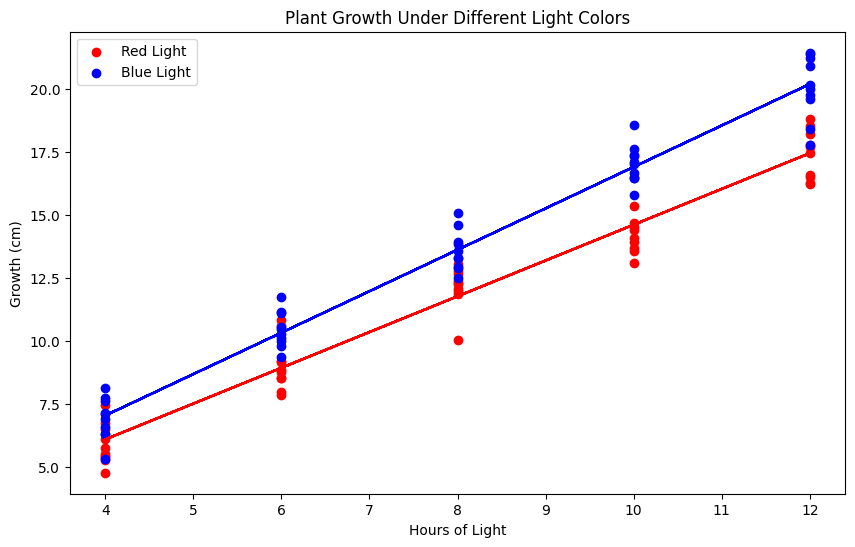

Red line of best fit:  y = 1.42x + 0.43
Blue line of best fit:  y = 1.64x + 0.48


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'data' is your DataFrame with 'Hours_of_Light', 'Growth_cm', and 'Light_Color'

# Separate the data by light color
data_red = data[data['Light_Color'] == 'Red']
data_blue = data[data['Light_Color'] == 'Blue']

# Calculate regression lines
slope_red, intercept_red, _, _, _ = linregress(data_red['Hours_of_Light'], data_red['Growth_cm'])
slope_blue, intercept_blue, _, _, _ = linregress(data_blue['Hours_of_Light'], data_blue['Growth_cm'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_red['Hours_of_Light'], data_red['Growth_cm'], color='red', label='Red Light')
plt.scatter(data_blue['Hours_of_Light'], data_blue['Growth_cm'], color='blue', label='Blue Light')

# Add regression lines
plt.plot(data_red['Hours_of_Light'], intercept_red + slope_red * data_red['Hours_of_Light'], 'r--')
plt.plot(data_blue['Hours_of_Light'], intercept_blue + slope_blue * data_blue['Hours_of_Light'], 'b--')

plt.title('Plant Growth Under Different Light Colors')
plt.xlabel('Hours of Light')
plt.ylabel('Growth (cm)')
plt.legend()
plt.show()

print(f"Red line of best fit:  y = {slope_red:.2f}x + {intercept_red:.2f}")
print(f"Blue line of best fit:  y = {slope_blue:.2f}x + {intercept_blue:.2f}")


Percent error is a measure used to determine the accuracy of an experimental value compared to a known or accepted value. It shows the discrepancy between an experimental value and a true value as a percentage of the true value. This can be particularly useful in scientific experiments to gauge the precision of measurements or the effectiveness of experimental techniques.

### Formula for Percent Error

The formula to calculate percent error is:

$$
\text{Percent Error} = \left( \frac{\text{Experimental Value} - \text{True Value}}{\text{True Value}} \right) \times 100\%
$$

### Worked Example

Suppose you are conducting an experiment to measure the boiling point of water at sea level. The accepted true value for the boiling point of water at sea level is 100°C.

- **Experimental Value:** Let's say you measure the boiling point to be 98°C.
- **True Value:** The accepted value is 100°C.

Using the percent error formula:

$$
\text{Percent Error} = \left( \frac{98°C - 100°C}{100°C} \right) \times 100\% = \left( \frac{-2°C}{100°C} \right) \times 100\% = -2\%
$$

### Interpretation

A percent error of -2% indicates that the experimental value is 2% less than the true value. The negative sign shows that the experimental value is below the true value. In practice, the absolute value of percent error is often used to discuss the magnitude of error without regard to direction, making it clear how close the experimental value is to the true value regardless of being higher or lower.

### Variability Measures: Range, Interquartile Range (IQR), Frequency Table, and Histogram

Variability measures help us understand the spread or dispersion of data around the central tendency. They are crucial for describing the distribution and identifying the variability within the dataset.

#### Range

- **Explanation:** The range is the difference between the maximum and minimum values in a dataset. It gives us an idea of the spread of the data.
- **Example:**
  - Data: 3, 7, 5, 9, 1
  - Calculation: Maximum value = 9, Minimum value = 1, Range = 9 - 1 = 8

- **Example with the sample data:**


In [12]:
range_value = data['Growth_cm'].max() - data['Growth_cm'].min()
print("Range:", range_value)

Range: 16.65184317246697



#### Interquartile Range (IQR)

- **Explanation:** IQR measures the variability of the middle 50% of the data. It's calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.
- **Introducing Quartiles:** Quartiles divide the data into four equal parts. Q1 is the median of the first half of the data, Q3 is the median of the second half, and Q2 is the overall median.
- **Example:**
  - Data: 2, 3, 5, 7, 11
  - Calculation: Q1 = 3, Q3 = 7, IQR = Q3 - Q1 = 4

- **Example 2: Odd Number of Data Points**

Calculating quartiles when you have an uneven number of data points involves a few steps, and whether you include the median in each half depends on the convention you follow. However, a common method is described below, which does not include the median in the halves if the total number of data points is odd.

1. **Order Your Data:** Arrange your data points from smallest to largest.

2. **Find the Median (Q2):** The median is the middle value of the ordered dataset. With an odd number of data points, the median is the central number. For an even number of data points, it's the average of the two central numbers.

3. **Divide the Data:** Once you find the median, divide your dataset into two halves:
   - The lower half consists of all data points below the median.
   - The upper half consists of all data points above the median.
   
   For an odd number of data points, do not include the median in either half.

4. **Calculate Q1 and Q3:**
   - **Q1 (First Quartile):** The median of the lower half. This divides the bottom 25% of data from the top 75%.
   - **Q3 (Third Quartile):** The median of the upper half. This divides the bottom 75% of data from the top 25%.


Consider the dataset: 2, 3, 5, 7, 11, 13, 17 (7 data points)

- **Ordered Data:** 2, 3, 5, 7, 11, 13, 17
- **Median (Q2):** 7 (the fourth value, leaving three values on either side)
- **Lower Half (for Q1):** 2, 3, 5
- **Upper Half (for Q3):** 11, 13, 17
- **Q1:** The median of 2, 3, 5 is 3.
- **Q3:** The median of 11, 13, 17 is 13.

### Key Points

- **For an odd number of data points,** the median is not included in the lower and upper halves when calculating Q1 and Q3.
- **For an even number of data points,** the dataset is split in half, and if calculating Q1 and Q3 results in needing an average of two middle numbers, take that average.

- **Sample Data Example:**


In [13]:
Q1 = data['Growth_cm'].quantile(0.25)
Q3 = data['Growth_cm'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 7.68200827232646



#### Frequency Table

- **Explanation:** A frequency table shows how often each value or range of values occurs in the dataset.
- **Example:**
  - Data: 1, 2, 2, 3, 3, 3, 4
  - Frequency Table:
    - 1: 1 time
    - 2: 2 times
    - 3: 3 times
    - 4: 1 time

- **Sample Data Example:**


In [14]:
frequency_table = data['Growth_cm'].value_counts().sort_index()
print("Frequency Table:\n", frequency_table)

Frequency Table:
 Growth_cm
4.779156     1
5.280156     1
5.336485     1
5.398293     1
5.437712     1
            ..
20.165413    1
20.913267    1
21.212526    1
21.375545    1
21.431000    1
Name: count, Length: 100, dtype: int64



#### Histogram

- **Explanation:** A histogram is a graphical representation of a frequency table, with bars representing the frequency of data in consecutive intervals.
- **Example:** For the data used in the frequency table example, a histogram would have bars of different heights representing the frequencies of 1, 2, 3, and 4.
- **Sample Data Example:**

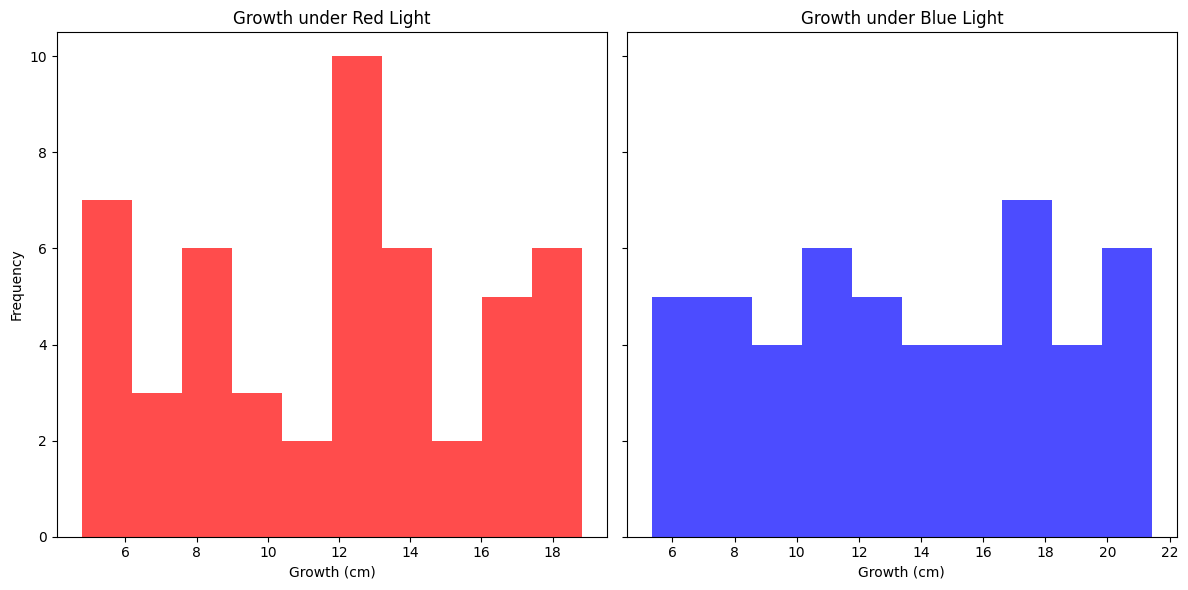

In [16]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the experiment's results

# Filtering the data for red and blue light
data_red = data[data['Light_Color'] == 'Red']['Growth_cm']
data_blue = data[data['Light_Color'] == 'Blue']['Growth_cm']

# Setting up the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting the histograms
axs[0].hist(data_red, color='red', alpha=0.7, bins=10)
axs[0].set_title('Growth under Red Light')
axs[0].set_xlabel('Growth (cm)')
axs[0].set_ylabel('Frequency')

axs[1].hist(data_blue, color='blue', alpha=0.7, bins=10)
axs[1].set_title('Growth under Blue Light')
axs[1].set_xlabel('Growth (cm)')

# Show the plot
plt.tight_layout()
plt.show()



These examples illustrate how to calculate and interpret key measures of variability, providing insights into the distribution and spread of data in your experiments.

### Standard Deviation: Intuition and Calculation

Standard deviation is a statistical measure that quantifies the amount of variation or dispersion in a set of data values. A low standard deviation indicates that the data points tend to be close to the mean (average) of the set, while a high standard deviation indicates that the data points are spread out over a wider range of values.

#### Intuition

Imagine you have test scores from two different classes. If one class has scores very close to the average score and another has scores that vary widely, the first class has a low standard deviation, while the second has a high standard deviation. Standard deviation gives us a numerical way to capture this idea of "spread" or "dispersion."

#### Equation for Standard Deviation

The formula to calculate the standard deviation ($\sigma$) for a population is:

$$
\sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}}
$$

where:
- $x_i$ represents each value in the dataset,
- $\mu$ is the mean of the dataset,
- $N$ is the total number of values in the dataset,
- $\sum$ denotes the summation.

For a sample (as opposed to a whole population), the formula adjusts the denominator to $N-1$ to correct for the bias in estimating a population standard deviation from a sample. This is known as Bessel's correction.

#### Worked Example

Given the dataset: 2, 4, 4, 4, 5, 5, 7, 9

1. Calculate the mean: $\mu = \frac{2 + 4 + 4 + 4 + 5 + 5 + 7 + 9}{8} = 5$
2. Subtract the mean and square the result for each observation:
   - $(2-5)^2 = 9$
   - $(4-5)^2 = 1$
   - $(4-5)^2 = 1$, and so on.
3. Sum these values: $9 + 1 + 1 + 1 + 0 + 0 + 4 + 16 = 32$
4. Divide by the number of data points (for a population): $32 / 8 = 4$
5. Take the square root: $\sqrt{4} = 2$

So, the standard deviation of our dataset is 2.

#### Graphical Representation

A normal distribution graph with annotations for the standard deviations can visually demonstrate how data points are distributed around the mean. Typically, about 68% of values lie within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

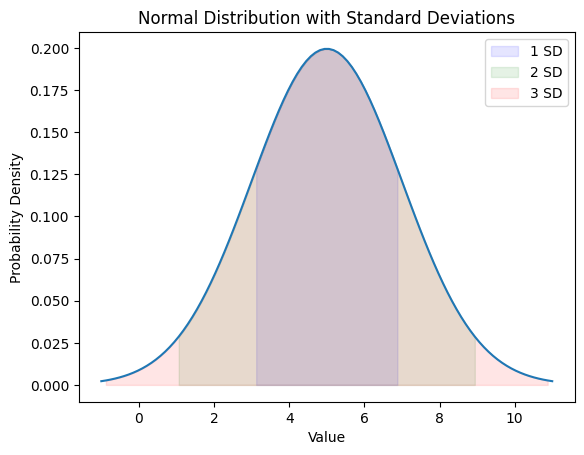

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate a normal distribution with a mean of 5 and standard deviation of 2
mu = 5
sigma = 2
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# Annotations for standard deviations
plt.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x < mu + sigma) & (x > mu - sigma), color='blue', alpha=0.1, label='1 SD')
plt.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x < mu + 2*sigma) & (x > mu - 2*sigma), color='green', alpha=0.1, label='2 SD')
plt.fill_between(x, stats.norm.pdf(x, mu, sigma), where=(x < mu + 3*sigma) & (x > mu - 3*sigma), color='red', alpha=0.1, label='3 SD')

plt.legend()
plt.title('Normal Distribution with Standard Deviations')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()